In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [2]:
data = pd.read_csv("covtype.data", header=None)
column_names = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points"]
wilderness_areas = ["Wilderness_Area" + str(i) for i in range(1, 5)]
column_names.extend(wilderness_areas)
soil_types = ["Soil_Type" + str(i) for i in range(1, 41)]
column_names.extend(soil_types)
column_names.append("Cover_Type")
data.columns = column_names
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
data.shape

(581012, 55)

In [4]:
data['Soil_Type'] = data[['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
                      'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
                      'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
                      'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
                      'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25',
                      'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
                      'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
                      'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']].sum(axis=1)

data['Wilderness_Area'] = data[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']].sum(axis=1)
data = data.drop(columns=['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
                      'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
                      'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
                      'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
                      'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25',
                      'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
                      'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
                      'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'])

data = data.drop(columns=['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'])
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,5,1,1
1,2590,56,2,212,-6,390,220,235,151,6225,5,1,1
2,2804,139,9,268,65,3180,234,238,135,6121,2,1,1
3,2785,155,18,242,118,3090,238,238,122,6211,2,1,1
4,2595,45,2,153,-1,391,220,234,150,6172,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,3,1,1
581008,2391,152,19,67,12,95,240,237,119,845,3,1,1
581009,2386,159,17,60,7,90,236,241,130,854,3,1,1
581010,2384,170,15,60,5,90,230,245,143,864,3,1,1


# Ejercicio 1

In [5]:
from sklearn.ensemble import ExtraTreesClassifier

X = data.drop(columns=['Cover_Type'])
y = data['Cover_Type']

clf = ExtraTreesClassifier(random_state = 100)
clf = clf.fit(X, y)
clf.feature_importances_

array([0.33667002, 0.05518203, 0.04448043, 0.07945314, 0.07532787,
       0.137743  , 0.0462498 , 0.04918995, 0.04513897, 0.13056479,
       0.        , 0.        ])

In [6]:
df_importance = clf.feature_importances_

In [7]:
# Filtra el tablón para quedarnos solamente con las variables que aglutinan hasta el 95% de la información que se requiere para estimar la variable objetivo.
df_importance = pd.DataFrame(df_importance, columns=['importance'])
df_importance = df_importance.sort_values(by=['importance'], ascending=False)
df_importance['cumsum'] = df_importance['importance'].cumsum()
df_importance = df_importance[df_importance['cumsum'] <= 0.95]
df_importance

,importance,cumsum
0,0.336670,0.336670
5,0.137743,0.474413
9,0.130565,0.604978
3,0.079453,0.684431
4,0.075328,0.759759
1,0.055182,0.814941
7,0.049190,0.864131
6,0.046250,0.910381


In [8]:
# Ahora con los datos del 95% se eliminan las variables que no aportan información útil.
importancia_filtrada = X.iloc[:, df_importance.index]
importancia_filtrada

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Aspect,Hillshade_Noon,Hillshade_9am
0,2596,510,6279,258,0,51,232,221
1,2590,390,6225,212,-6,56,235,220
2,2804,3180,6121,268,65,139,238,234
3,2785,3090,6211,242,118,155,238,238
4,2595,391,6172,153,-1,45,234,220
...,...,...,...,...,...,...,...,...
581007,2396,108,837,85,17,153,237,240
581008,2391,95,845,67,12,152,237,240
581009,2386,90,854,60,7,159,241,236
581010,2384,90,864,60,5,170,245,230


# Ejercicio 2

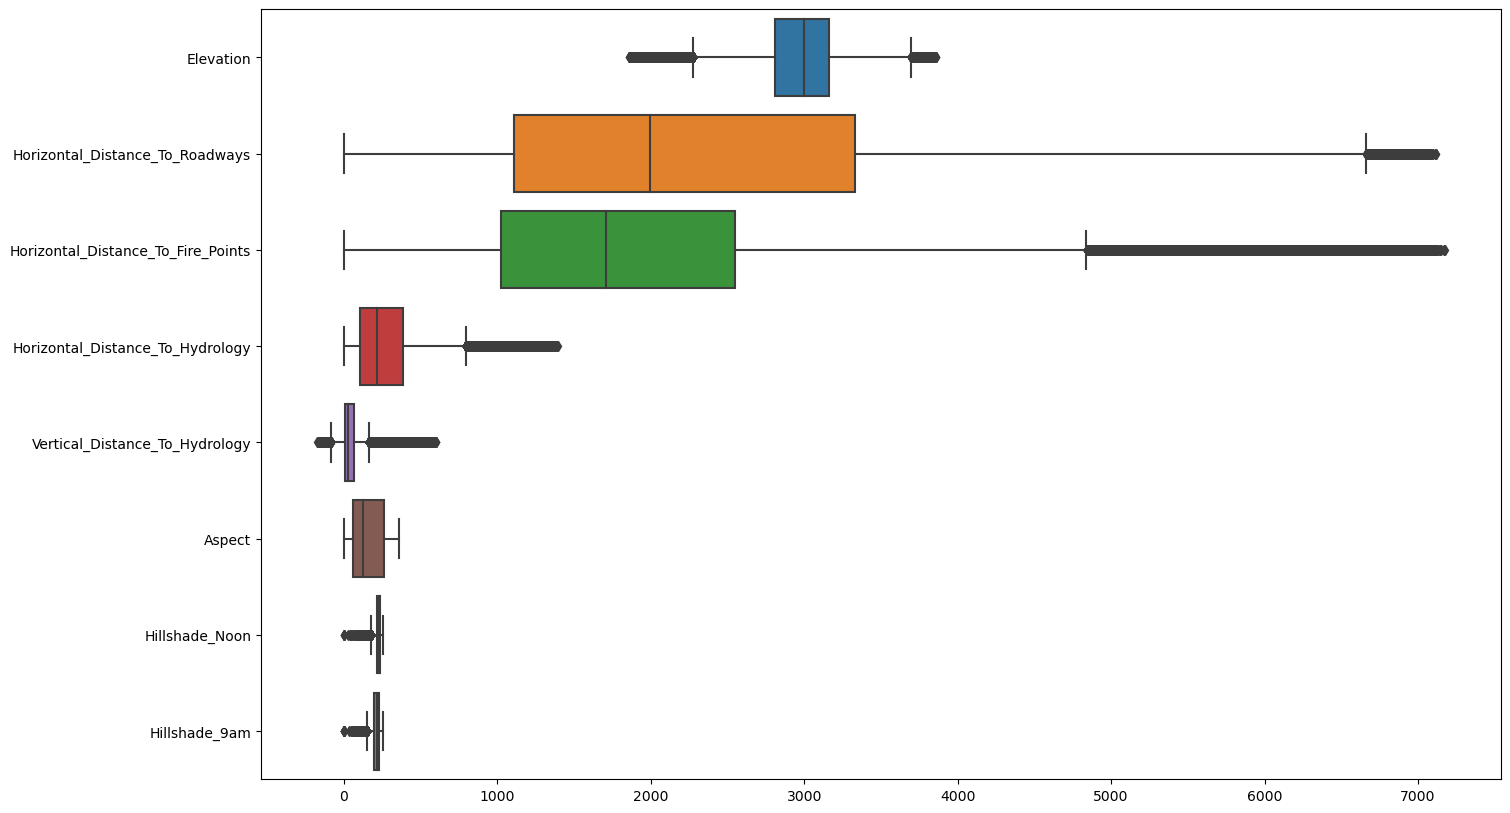

In [9]:
plt.figure(figsize=(16,10))
sns.boxplot(data=importancia_filtrada, orient="h")
plt.show()

Normalizar las variables:

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(importancia_filtrada)
importancia_filtrada = scaler.transform(importancia_filtrada)
importancia_filtrada = pd.DataFrame(importancia_filtrada, columns=X.columns[df_importance.index])
importancia_filtrada

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Aspect,Hillshade_Noon,Hillshade_9am
0,0.368684,0.071659,0.875366,0.184681,0.223514,0.141667,0.913386,0.870079
1,0.365683,0.054798,0.867838,0.151754,0.215762,0.155556,0.925197,0.866142
2,0.472736,0.446817,0.853339,0.191840,0.307494,0.386111,0.937008,0.921260
3,0.463232,0.434172,0.865886,0.173228,0.375969,0.430556,0.937008,0.937008
4,0.368184,0.054939,0.860449,0.109520,0.222222,0.125000,0.921260,0.866142
...,...,...,...,...,...,...,...,...
581007,0.268634,0.015175,0.116688,0.060845,0.245478,0.425000,0.933071,0.944882
581008,0.266133,0.013348,0.117803,0.047960,0.239018,0.422222,0.933071,0.944882
581009,0.263632,0.012646,0.119058,0.042949,0.232558,0.441667,0.948819,0.929134
581010,0.262631,0.012646,0.120452,0.042949,0.229974,0.472222,0.964567,0.905512


In [11]:
# Agregar a la tabla la variable Cover_Type
importancia_filtrada['Cover_Type'] = y
importancia_filtrada
data_scaled = importancia_filtrada.copy()
data_scaled

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Aspect,Hillshade_Noon,Hillshade_9am,Cover_Type
0,0.368684,0.071659,0.875366,0.184681,0.223514,0.141667,0.913386,0.870079,5
1,0.365683,0.054798,0.867838,0.151754,0.215762,0.155556,0.925197,0.866142,5
2,0.472736,0.446817,0.853339,0.191840,0.307494,0.386111,0.937008,0.921260,2
3,0.463232,0.434172,0.865886,0.173228,0.375969,0.430556,0.937008,0.937008,2
4,0.368184,0.054939,0.860449,0.109520,0.222222,0.125000,0.921260,0.866142,5
...,...,...,...,...,...,...,...,...,...
581007,0.268634,0.015175,0.116688,0.060845,0.245478,0.425000,0.933071,0.944882,3
581008,0.266133,0.013348,0.117803,0.047960,0.239018,0.422222,0.933071,0.944882,3
581009,0.263632,0.012646,0.119058,0.042949,0.232558,0.441667,0.948819,0.929134,3
581010,0.262631,0.012646,0.120452,0.042949,0.229974,0.472222,0.964567,0.905512,3


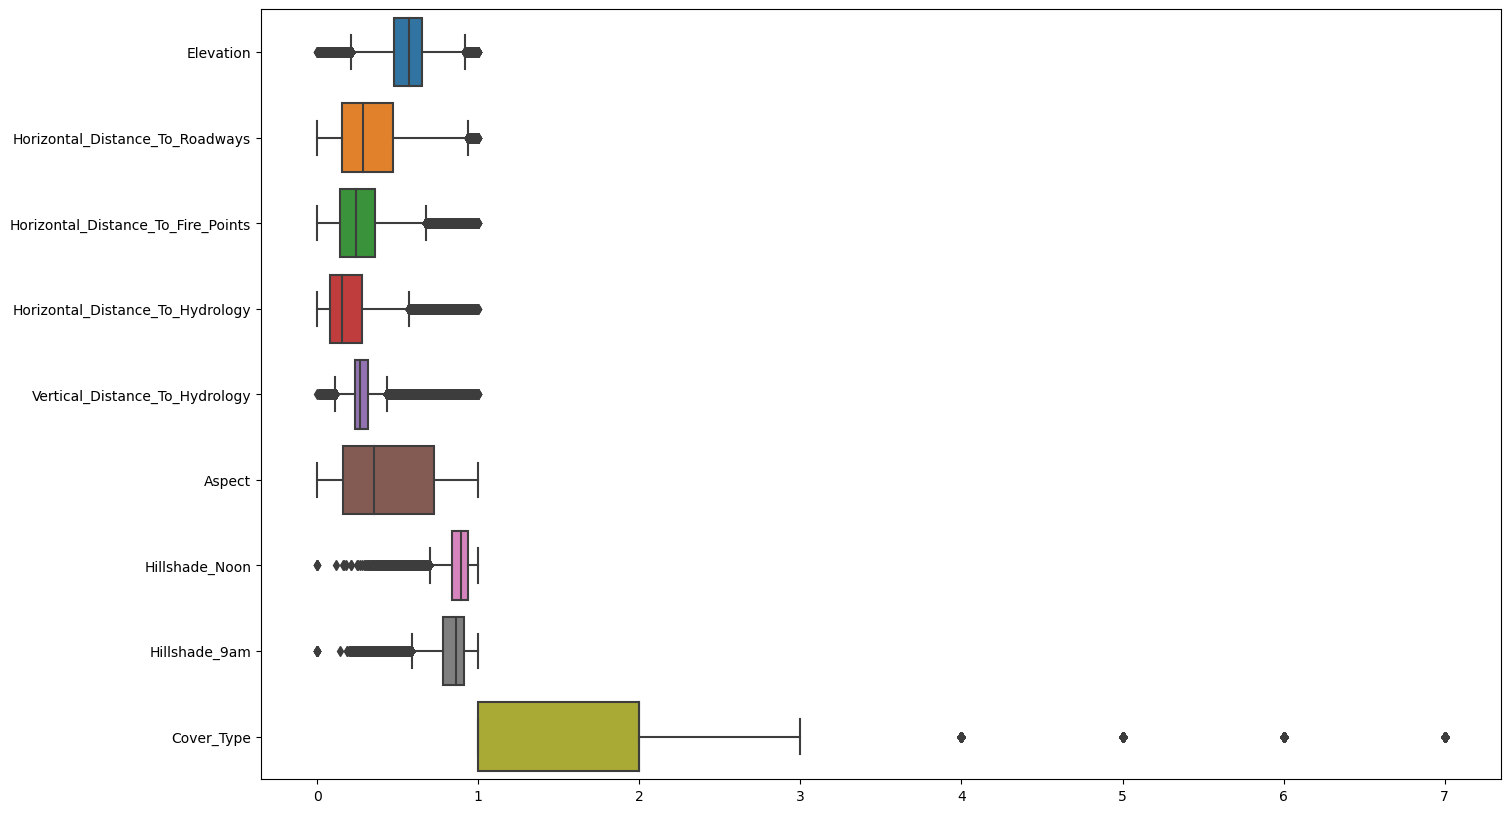

In [12]:
plt.figure(figsize=(16,10))
sns.boxplot(data=data_scaled, orient="h")
plt.show()

# Ejericio 3

3.1

In [74]:
from sklearn.model_selection import train_test_split

X = data_scaled.drop(columns=['Cover_Type'])
y = data_scaled['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [14]:
X_test.to_csv("X_test.csv", index = False)
y_test.to_csv("y_test.csv", index = False)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100)

In [75]:
print(y_test)

491158    2
328145    2
442301    1
55701     2
558604    2
         ..
331997    2
200763    2
276666    3
66542     1
244866    2
Name: Cover_Type, Length: 116203, dtype: int64


3.2

In [16]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression(max_iter= 1000, random_state=100)

3.3

In [17]:
log_r.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=100)

In [18]:
y_pred = log_r.predict(X_test)

In [19]:
print(y_pred)

[2 2 1 ... 3 2 2]


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6894486372985207

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.67      0.70      0.68     42446
           2       0.72      0.79      0.75     56592
           3       0.59      0.70      0.64      7133
           4       0.55      0.05      0.09       571
           5       0.00      0.00      0.00      1847
           6       0.30      0.06      0.10      3456
           7       0.56      0.20      0.30      4158

    accuracy                           0.69    116203
   macro avg       0.48      0.36      0.37    116203
weighted avg       0.67      0.69      0.67    116203



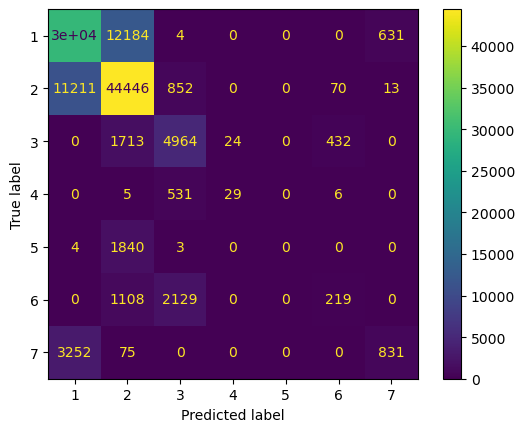

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cua = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=log_r.classes_)
cua.plot()

plt.show()

In [23]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.6702477364309217

# Ejercicio 4

4.1

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=100)

In [30]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [36]:
y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)


0.9119902240045438

In [37]:
f1_score(y_test, y_pred, average='weighted')

0.9119910788766402

In [38]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.91      0.91      0.91     42446
           2       0.93      0.93      0.93     56592
           3       0.89      0.89      0.89      7133
           4       0.78      0.79      0.79       571
           5       0.76      0.77      0.77      1847
           6       0.82      0.81      0.81      3456
           7       0.91      0.91      0.91      4158

    accuracy                           0.91    116203
   macro avg       0.86      0.86      0.86    116203
weighted avg       0.91      0.91      0.91    116203



4.2

In [51]:
# hacemos la curva de complejidad
from sklearn.model_selection import validation_curve
param_range = np.arange(2, 30, 2)

In [52]:
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X_train, y_train, param_name="max_depth", param_range=param_range,
    scoring="accuracy", n_jobs=1)

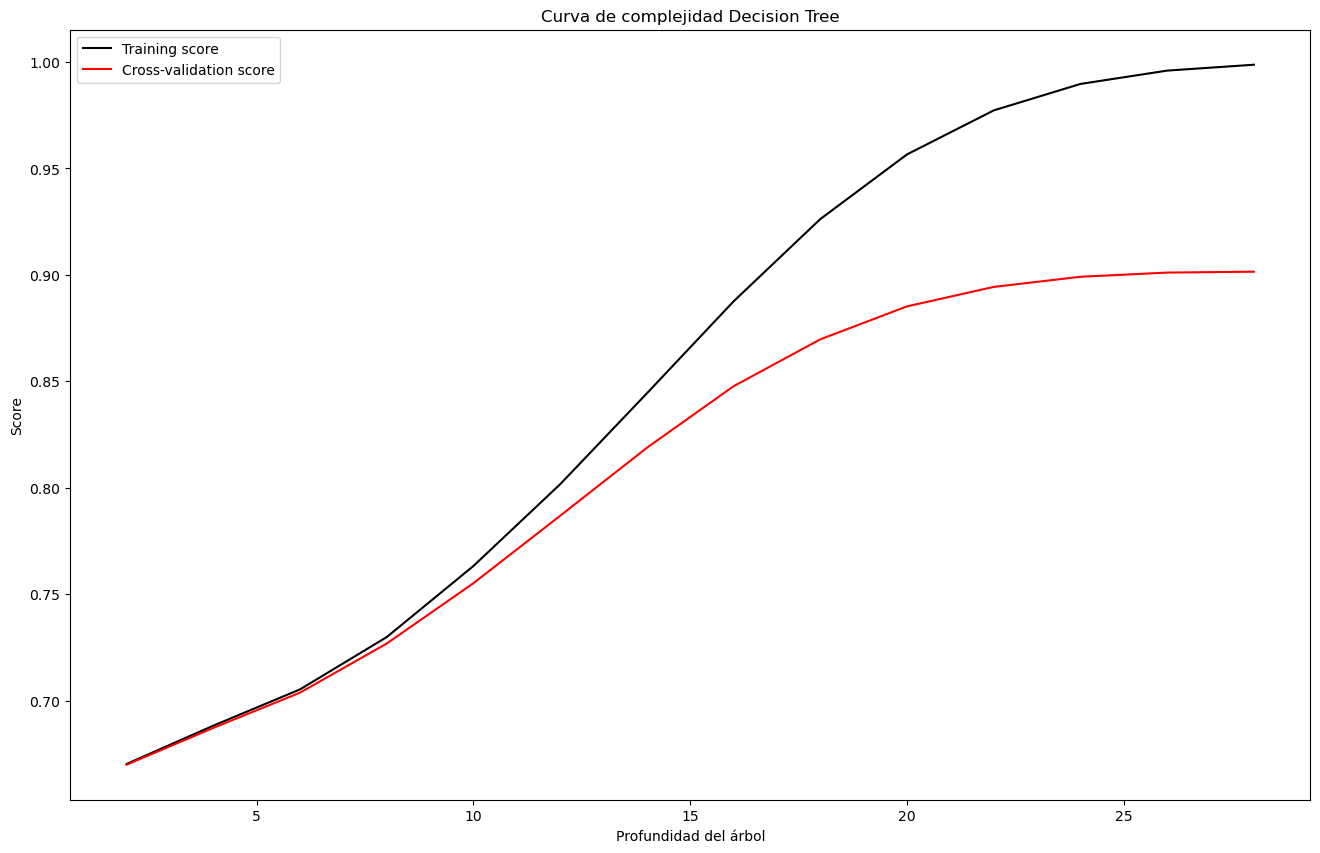

In [53]:
plt.figure(figsize=(16,10))
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training score", color="black")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Cross-validation score", color="red")
plt.title("Curva de complejidad Decision Tree")
plt.xlabel("Profundidad del árbol")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

4.3

In [54]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    DecisionTreeClassifier(), X_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10), random_state=100)

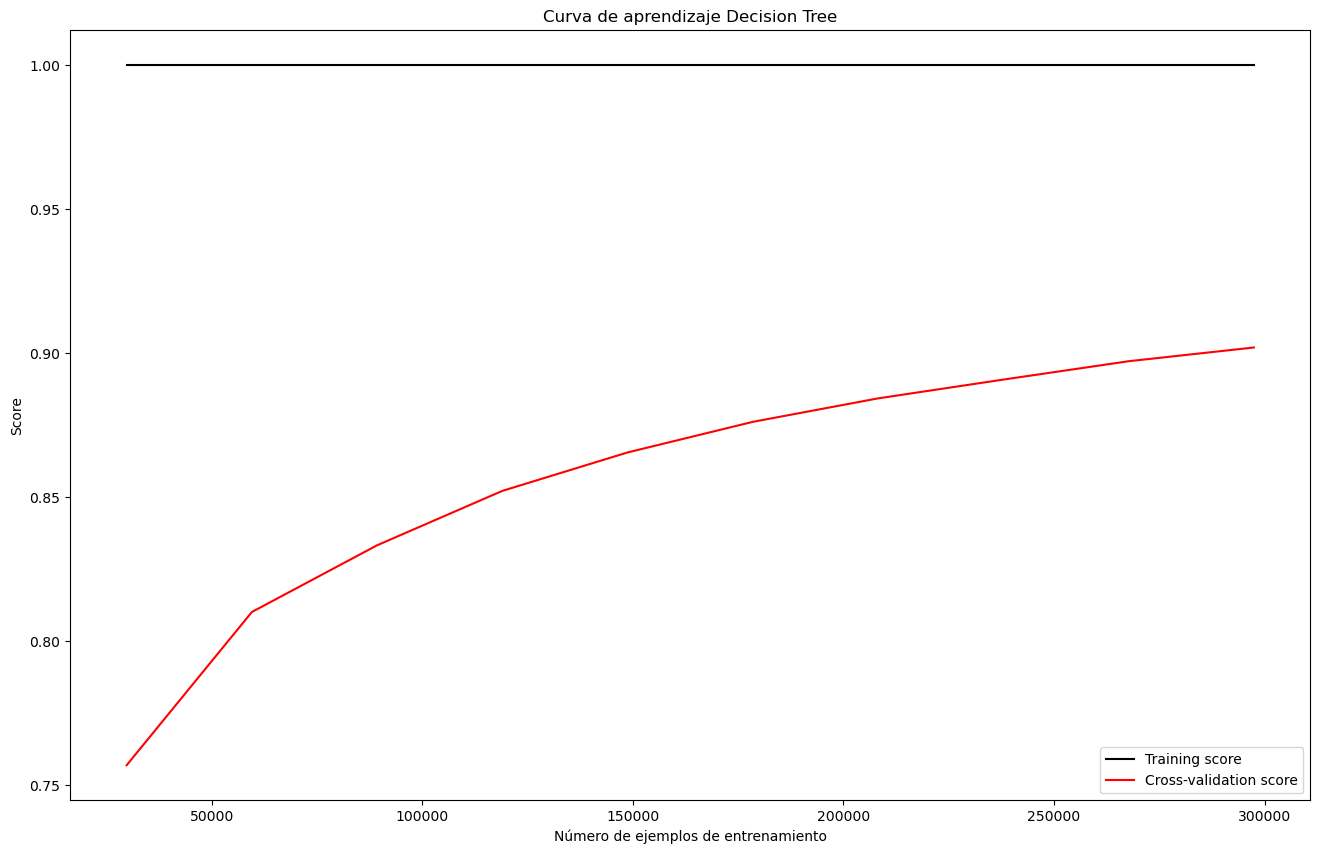

In [55]:
plt.figure(figsize=(16,10))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training score", color="black")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-validation score", color="red")
plt.title("Curva de aprendizaje Decision Tree")
plt.xlabel("Número de ejemplos de entrenamiento")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# Ejercicio 5

5.1

In [57]:
# Hacer un modelo de Random Forest Classifire
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=100)

In [58]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [59]:
y_pred = rfc.predict(X_test)

5.2

In [60]:
# profundidad de los arboles
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

In [61]:
rfc.estimators_[0].get_depth()

42

In [62]:
np.median([tree.get_depth() for tree in rfc.estimators_])

39.0

5.3

In [66]:
param_range = np.arange(200, 400, 50)

In [68]:
param_range2 = np.arange(20, 40, 2)

In [69]:
param_range3 = ["auto", "log2", None]

In [77]:
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9454317014190684

In [78]:
f1_score(y_test, y_pred, average='weighted')

0.9450293591336117

In [79]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.95      0.94      0.95     42446
           2       0.94      0.97      0.95     56592
           3       0.93      0.94      0.94      7133
           4       0.91      0.83      0.87       571
           5       0.95      0.70      0.81      1847
           6       0.92      0.86      0.89      3456
           7       0.98      0.92      0.95      4158

    accuracy                           0.95    116203
   macro avg       0.94      0.88      0.91    116203
weighted avg       0.95      0.95      0.95    116203



In [80]:
rfc = RandomForestClassifier(random_state=100, oob_score=True)
rfc.fit(X_train, y_train)
rfc.oob_score_

0.9496330750910589

5.4

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(random_state=100, oob_score=True), X_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10), random_state=100)

# Ejercicio 6

6.1

In [ ]:
# XGBoost Classifire
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=100)

In [ ]:
xgb.get_params()

6.2

In [ ]:
xgb = XGBClassifier(random_state=100, n_jobs=-1, eval_metric='mlogloss')

6.3

In [ ]:
param_range = np.arange(100, 500, 100)

In [ ]:
param_range2 = np.arange(6, 20, 2)

In [ ]:
param_range3 = [0.01, 0.1, 0.3, 0.5]

In [ ]:
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
f1_score(y_test, y_pred, average='weighted')

In [ ]:
print(classification_report(y_test, y_pred, zero_division=0))

6.4

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    XGBClassifier(random_state=100, n_jobs=-1, eval_metric='mlogloss'), X_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10), random_state=100)

# Ejercicio 7


7.1

In [82]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [83]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [84]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()

In [85]:
from sklearn.naive_bayes import BernoulliNB

In [87]:
accuracy_score(y_test, y_pred)

0.9454317014190684

In [88]:
f1_score(y_test, y_pred, average='weighted')

0.9450293591336117

In [89]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.95      0.94      0.95     42446
           2       0.94      0.97      0.95     56592
           3       0.93      0.94      0.94      7133
           4       0.91      0.83      0.87       571
           5       0.95      0.70      0.81      1847
           6       0.92      0.86      0.89      3456
           7       0.98      0.92      0.95      4158

    accuracy                           0.95    116203
   macro avg       0.94      0.88      0.91    116203
weighted avg       0.95      0.95      0.95    116203



7.2

In [90]:
train_sizes, train_scores, test_scores = learning_curve(
    GaussianNB(), X_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10), random_state=100)

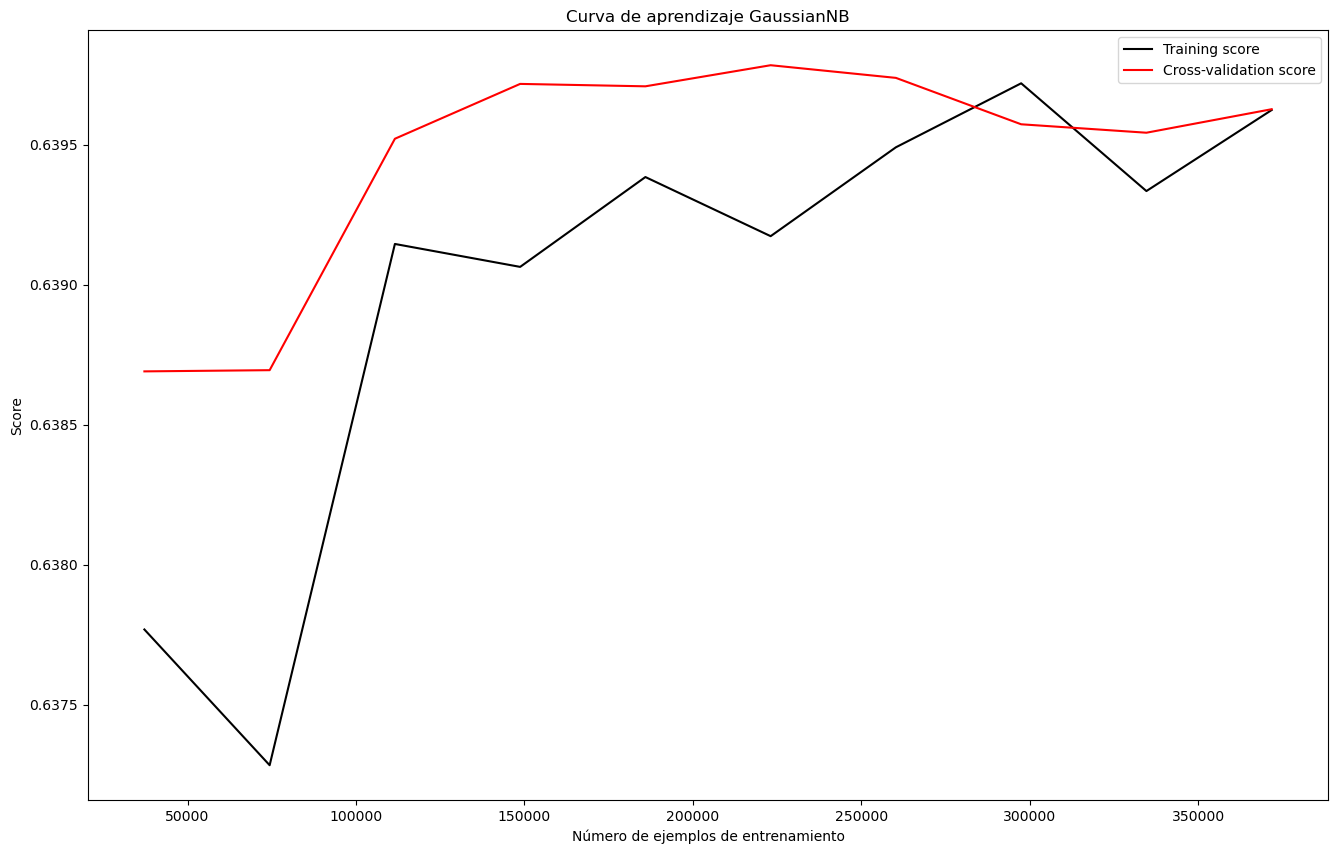

In [108]:
plt.figure(figsize=(16,10))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training score", color="black")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-validation score", color="red")
plt.title("Curva de aprendizaje GaussianNB")
plt.xlabel("Número de ejemplos de entrenamiento")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# Ejercicio 8

In [96]:
#  K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
random_state=100

In [101]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

8.1

In [98]:
param_range = np.arange(1, 100, 2)

In [102]:
y_pred = knn.predict(X_test)

c:\Users\jaal2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [105]:
accuracy_score(y_test, y_pred)

0.9340722700790858

In [103]:
f1_score(y_test, y_pred, average='weighted')

0.9338976144735147

In [104]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.94      0.93      0.93     42446
           2       0.94      0.95      0.95     56592
           3       0.91      0.92      0.92      7133
           4       0.85      0.80      0.82       571
           5       0.86      0.77      0.81      1847
           6       0.86      0.84      0.85      3456
           7       0.94      0.93      0.93      4158

    accuracy                           0.93    116203
   macro avg       0.90      0.88      0.89    116203
weighted avg       0.93      0.93      0.93    116203



8.2

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    KNeighborsClassifier(), X_train, y_train, cv=5, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10), random_state=100)

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training score", color="black")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Cross-validation score", color="red")
plt.title("Curva de complejidad KNN")
plt.xlabel("Número de vecinos")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# Ejercicio 9

9.1

In [109]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=100)

9.2

In [110]:
mlp.fit(X_train, y_train)

In [ ]:
mlp = MLPClassifier(random_state=100, max_iter=10000, alpha=1e-5, tol=1e-5)